In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import LinearNDInterpolator

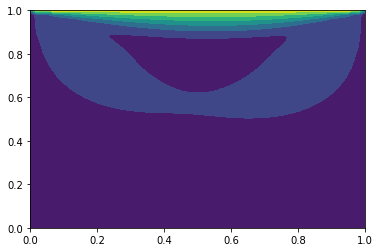

In [20]:
case = 'n0_5_k0_1'

data = np.loadtxt('NonNewtonian/cavityNonNewtonian_'+case+'_0.csv',delimiter = ',')
u_data = data[:,1] 
v_data = data[:,2]
X = data[:,4]
Z = data[:,5]

dx = 0.02
xx,zz = np.meshgrid(np.arange(0,1.0+dx,dx),np.arange(0,1.0+dx,dx))
u_interp = LinearNDInterpolator(list(zip(X,Z)), u_data)
v_interp = LinearNDInterpolator(list(zip(X,Z)), v_data)

u1 = u_interp(xx,zz)
v1 = v_interp(xx,zz)

plt.contourf(xx,zz,np.sqrt(u1**2 + v1**2))

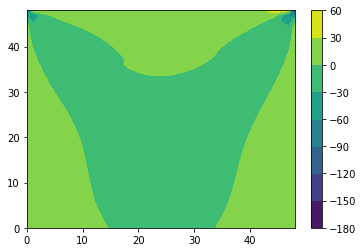

In [21]:
#calculating derivatives:
dudx = (u1[1:-1,2:] - u1[1:-1,0:-2])/(2*dx)
dudz = (u1[2:,1:-1] - u1[0:-2,1:-1])/(2*dx)
dvdx = (v1[1:-1,2:] - v1[1:-1,0:-2])/(2*dx)
dvdz = (v1[2:,1:-1] - v1[0:-2,1:-1])/(2*dx)

d2udx2 = ( u1[1:-1,2:] + u1[1:-1,0:-2] - 2*u1[1:-1,1:-1])/dx**2
d2vdx2 = ( v1[1:-1,2:] + v1[1:-1,0:-2] - 2*v1[1:-1,1:-1])/dx**2

d2udz2 = ( u1[2:,1:-1] + u1[0:-2,1:-1] - 2*u1[1:-1,1:-1])/dx**2
d2vdz2 = ( v1[2:,1:-1] + v1[0:-2,1:-1] - 2*v1[1:-1,1:-1])/dx**2

dudxtemp = (u1[:,2:] - u1[:,0:-2])/(2*dx)
dvdxtemp = (v1[:,2:] - v1[:,0:-2])/(2*dx)
d2udzdx = (dudxtemp[2:,:] - dudxtemp[0:-2,:])/(2*dx)
d2vdzdx = (dvdxtemp[2:,:] - dvdxtemp[0:-2,:])/(2*dx)

plt.contourf(d2vdzdx)
plt.colorbar()

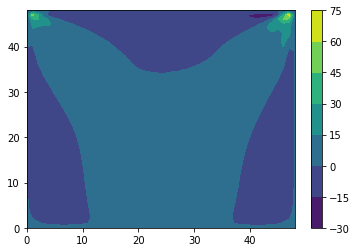

In [22]:
#calculating finite difference matrices:
nx = dudx.shape[0]
nz = dudx.shape[1]
N = nx*nz
Dmat = np.zeros((nx,nx))
D2mat = np.zeros((nx,nx))
Imat = np.zeros((nx,nx))
for i in range(1,nx-1):
    Dmat[i,i-1] = -1
    Dmat[i,i+1] = 1
    D2mat[i,i-1] = 1
    D2mat[i,i] = -2 
    D2mat[i,i+1] = 1
    Imat[i,i] = 1

Dmat /= 2*dx 
D2mat /= dx**2

Dx = np.kron(Imat,Dmat)
D2x = np.kron(Imat,D2mat)
Dz = np.kron(Dmat,Imat)
D2z = np.kron(D2mat,Imat)

u_vect = u1[1:-1,1:-1].reshape((N,1))
visc = np.matmul(D2x,u_vect).reshape((nx,nx)) + 0.1
shear = np.sqrt(dudx**2 + dvdx**2 + dudz**2 + dvdz**2)

plt.contourf(visc)
plt.colorbar() 



Text(0, 0.5, 'viscosity')

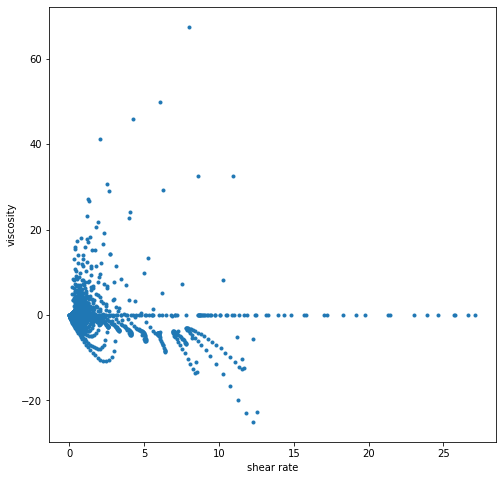

In [23]:
plt.figure(figsize=(8,8))
plt.plot(shear.flatten(),visc.flatten(),'.')
plt.xlabel('shear rate')
plt.ylabel('viscosity')

Text(0, 0.5, 'absolute value of viscosity')

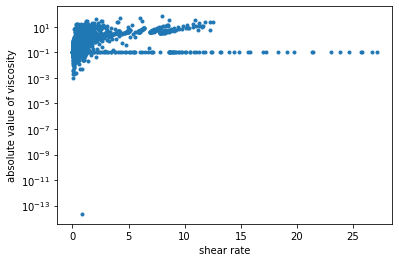

In [24]:
plt.plot(shear.flatten(),np.abs(visc.flatten()),'.')
plt.yscale('log')
plt.xlabel('shear rate')
plt.ylabel('absolute value of viscosity')